
Dataset: Fashion-MNIST

Trained on: Randomly-Colored-Fashion-MNIST

Tested on: Fashion-MNIST

Model: CNN with 2 Conv Layers, 2 Max Pooling Layers, and 2 Fully Connected Layers


In [1]:
import os


os.chdir('../../experiments')

# print("Current working directory:", os.getcwd())

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import random


# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

Load dataset

In [3]:

directory = "../data"
files = os.listdir(directory)
files

['FashionMNIST', 'MNIST']

In [8]:
grey_transform = transforms.Compose([
    # Convert grayscale to 3-channel RGB
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
                         )  # Normalize for 3 channels

])

In [ ]:
class RandomColorize:
    def __call__(self, img):
        # Split the single channel into 3 identical channels
        img = F.to_tensor(img)  # Convert to tensor
        img = img.repeat(3, 1, 1)  # Duplicate grayscale channel to 3 channels

        # Apply random scaling to each channel
        r, g, b = random.uniform(0.6, 1.4), random.uniform(
            0.6, 1.4), random.uniform(0.6, 1.4)
        img[0] *= r
        img[1] *= g
        img[2] *= b

        # Clip values to the range [0, 1]
        img = torch.clamp(img, 0, 1)
        return img

In [6]:
color_transform = transforms.Compose([
    RandomColorize(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
                         )  # Normalize 3 channels
])

In [7]:
train_batch_size = 64
test_batch_size = 128

In [10]:
colored_train_dataset = datasets.FashionMNIST(
    root=directory, train=True, transform=color_transform, download=True)
colored_train_loader = DataLoader(
    colored_train_dataset, batch_size=train_batch_size, shuffle=False)

colored_test_dataset = datasets.FashionMNIST(
    root=directory, train=False, transform=color_transform, download=True)
colored_test_loader = DataLoader(
    colored_test_dataset, batch_size=test_batch_size, shuffle=False)

In [11]:
grey_train_dataset = datasets.FashionMNIST(
    directory, train=True, download=True, transform=grey_transform)

grey_test_dataset = datasets.FashionMNIST(
    directory, train=False, transform=grey_transform)

grey_train_loader = DataLoader(
    grey_train_dataset, batch_size=train_batch_size, shuffle=True)
grey_test_loader = DataLoader(
    grey_test_dataset, batch_size=test_batch_size, shuffle=False)

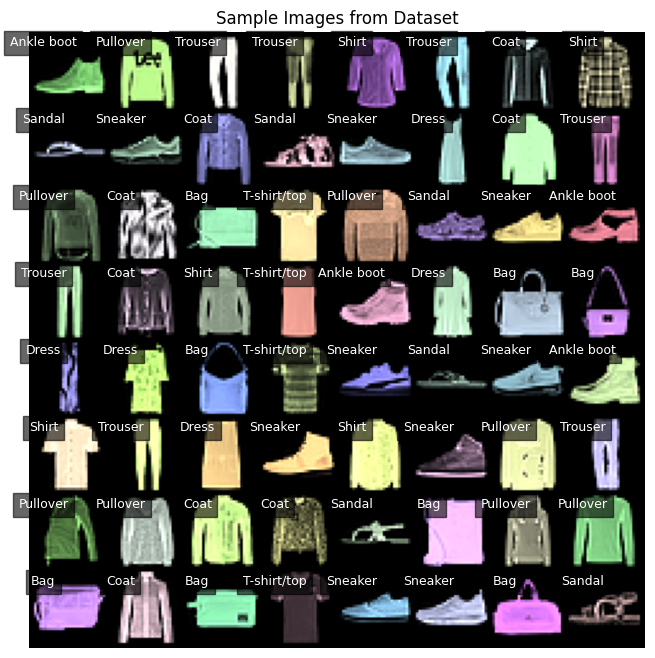

In [ ]:
fashion_mnist_classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


def show_images_from_loader(loader, classes=fashion_mnist_classes, n_images=64):

    # Get a batch of images and labels
    images, labels = next(iter(loader))

    # Select n_images from the batch
    images, labels = images[:n_images], labels[:n_images]

    # Create a grid of images
    grid = utils.make_grid(images, nrow=int(
        n_images**0.5), padding=2, normalize=True)

    plt.figure(figsize=(8, 8))
    # Convert from (C, H, W) to (H, W, C) for plotting
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.title("Sample Images from Dataset")

    for i, label in enumerate(labels):
        row, col = divmod(i, int(n_images**0.5))
        plt.text(col * (grid.size(2) / n_images**0.5) + 5,
                 row * (grid.size(1) / n_images**0.5) + 5,
                 classes[label.item()],
                 color='white', fontsize=9, ha='center', bbox=dict(facecolor='black', alpha=0.6))
    plt.show()


show_images_from_loader(colored_test_loader)

Train on the randomly colored fashion-mnist dataset

In [13]:
from train import train, test
from cnn import _2LayerCNN

In [14]:
model = _2LayerCNN().to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [15]:
for epoch in range(1, 5):
    train(model, device, colored_train_loader, optimizer, epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307617
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.593551
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.317596
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.479885
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.443423
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.470338
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.311924
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.510484
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.422881
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.293986
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.208132
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.288215
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.198514
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.319767
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.348160
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.436552
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.263374
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.371800
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.327923
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.206619
Train Epoch:

In [16]:
test(model, device, colored_test_loader)


Test set: Average loss: 0.0021, Accuracy: 9022/10000 (90.22%)



In [17]:
test(model, device, grey_test_loader)


Test set: Average loss: 0.0021, Accuracy: 9029/10000 (90.29%)

